<a href="https://colab.research.google.com/github/juanosalvador/database-Reingreso-Hospitalario/blob/main/Clasificadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
#ruta = '/content/drive/MyDrive/001_Diplomado Ciencia de datos Avanzado/Proyecto_1/atributos_reingreso_hospitalarios, index = False'
url = 'https://raw.githubusercontent.com/juanosalvador/database-Reingreso-Hospitalario/main/bd_reingreso_sin_dummys.csv'
url2 = 'https://raw.githubusercontent.com/juanosalvador/database-Reingreso-Hospitalario/main/bd_dummies_reingreso.csv'

In [3]:
df = pd.read_csv(url)
#df = df.drop('Unnamed: 0', axis = 1)

In [4]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,visitas_totales,tratamientos_tomados,categorias_diag_1
0,Caucasian,Female,15,1,1,7,3,59,0,18,0,0,0,9,None,None,Ch,Yes,>30,0,1.0,0
1,AfricanAmerican,Female,25,1,1,7,2,11,5,13,2,0,1,6,None,None,No,Yes,NO,3,1.0,0
2,Caucasian,Male,35,1,1,7,2,44,1,16,0,0,0,7,None,None,Ch,Yes,NO,0,1.0,0
3,Caucasian,Male,45,1,1,7,1,51,0,8,0,0,0,5,None,None,Ch,Yes,NO,0,2.0,8
4,Caucasian,Male,55,2,1,2,3,31,6,16,0,0,0,9,None,None,No,Yes,>30,0,1.0,1


#<center><h1>Aplicando de correlacion de Pearson</h1></center>

In [5]:
from matplotlib.colors import ListedColormap
import seaborn as sns
my_cmap = ListedColormap(sns.light_palette((250, 100, 50), input="husl", n_colors=50).as_hex())

In [6]:
pearson_correlation = df.corr(method='pearson')
pearson_correlation.style.background_gradient(cmap = my_cmap, axis = 0)

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,visitas_totales,tratamientos_tomados,categorias_diag_1
age,1.000000,0.047209,-0.022161,-0.052930,-0.029746,-0.025750,0.120809,0.095560,-0.002360,-0.014808,-0.004116,-0.023733,-0.008803,0.055312,0.012024
admission_type_id,0.047209,1.000000,0.093745,0.121866,-0.017309,-0.111841,0.134883,0.098591,0.037361,-0.018783,0.041603,-0.121217,0.038607,-0.010249,0.064955
discharge_disposition_id,-0.022161,0.093745,1.000000,-0.005367,0.162532,0.012607,0.017328,0.111231,-0.019958,-0.028134,-0.028024,0.023906,-0.036753,-0.014292,0.040092
admission_source_id,-0.052930,0.121866,-0.005367,1.000000,0.006421,0.093014,-0.128845,-0.060240,0.016654,0.054747,0.031285,0.066717,0.045205,-0.012827,-0.090517
time_in_hospital,-0.029746,-0.017309,0.162532,0.006421,1.000000,0.331883,0.187207,0.465518,-0.017815,-0.010313,0.062435,0.223883,0.009197,0.085009,0.002456
num_lab_procedures,-0.025750,-0.111841,0.012607,0.093014,0.331883,1.000000,0.043894,0.258576,-0.009265,0.015995,0.080321,0.151241,0.032525,0.042912,-0.050780
num_procedures,0.120809,0.134883,0.017328,-0.128845,0.187207,0.043894,1.000000,0.397342,-0.020939,-0.035930,-0.025100,0.068498,-0.039056,0.003455,0.018815
num_medications,0.095560,0.098591,0.111231,-0.060240,0.465518,0.258576,0.397342,1.000000,0.024054,0.002013,0.037340,0.236459,0.034347,0.236039,0.064557
number_outpatient,-0.002360,0.037361,-0.019958,0.016654,-0.017815,-0.009265,-0.020939,0.024054,1.000000,0.094805,0.067612,0.073936,0.808923,0.014943,0.006000
number_emergency,-0.014808,-0.018783,-0.028134,0.054747,-0.010313,0.015995,-0.035930,0.002013,0.094805,1.000000,0.148483,0.049411,0.491916,0.015215,-0.003954


In [7]:
## FUncion para identificar correlaciones
def PearsonCorrelation(df, umbral):
  count = 0
  correlacion = 0
  for i in range(len(df)):
    #print('---')
    count = count +1
    for j in range(count,len(df)):
      #print(count,'--',df.iloc[i][j], '--', i, '--',j)
      if abs(df.iloc[i][j]) >= umbral:
        correlacion = correlacion + 1
        print(df.columns[i], ' y ', df.columns[j], ' están correlacionas con un r de: ', df.iloc[i][j])
  if correlacion == 0:
    print('No hay columnas correlacionas con ese coeficiente')

In [8]:
PearsonCorrelation(pearson_correlation, 0.5)

number_outpatient  y  visitas_totales  están correlacionas con un r de:  0.8089234890374818
number_inpatient  y  visitas_totales  están correlacionas con un r de:  0.5233481561692991


Se estableció un coeficiente de correlación de 0.5. El atributo visitas totales es la suma de tres atributos; number_outpatient, number_inpatient y number_emergency, por eso están tan correlacionadas. No se eliminarán atributos por este método.

In [9]:
df['readmitted'].value_counts()

NO     39248
>30    21521
<30     6074
Name: readmitted, dtype: int64

In [10]:
df = pd.read_csv(url2)
df.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,visitas_totales,tratamientos_tomados,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_type_id_7,admission_type_id_8,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,discharge_disposition_id_8,discharge_disposition_id_9,discharge_disposition_id_10,discharge_disposition_id_12,discharge_disposition_id_15,discharge_disposition_id_16,discharge_disposition_id_17,discharge_disposition_id_18,discharge_disposition_id_22,discharge_disposition_id_23,discharge_disposition_id_24,discharge_disposition_id_25,discharge_disposition_id_27,discharge_disposition_id_28,admission_source_id_2,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_20,admission_source_id_22,admission_source_id_25,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_No,diabetesMed_Yes,categorias_diag_1_1,categorias_diag_1_2,categorias_diag_1_3,categorias_diag_1_4,categorias_diag_1_5,categorias_diag_1_6,categorias_diag_1_7,categorias_diag_1_8,OUTPUT_LABEL
0,15,3,59,0,18,0,0,0,9,>30,0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,25,2,11,5,13,2,0,1,6,NO,3,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0
2,35,2,44,1,16,0,0,0,7,NO,0,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,45,1,51,0,8,0,0,0,5,NO,0,2.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
4,55,3,31,6,16,0,0,0,9,>30,0,1.0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0


In [11]:
## Creando label de tres clases
#df['OUTPUT_LABEL_TRES_CLASES'] = df['readmitted'].replace({'<30':1, '>30':0,'NO': 2 })
#df['label'] = LabelEncoder().fit_transform(df['readmitted'])

In [12]:
#df['label'].value_counts()
df['OUTPUT_LABEL'].value_counts()

0    60769
1     6074
Name: OUTPUT_LABEL, dtype: int64

In [13]:
df.columns.values

array(['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'readmitted',
       'visitas_totales', 'tratamientos_tomados', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_Male',
       'admission_type_id_2', 'admission_type_id_3',
       'admission_type_id_4', 'admission_type_id_5',
       'admission_type_id_6', 'admission_type_id_7',
       'admission_type_id_8', 'discharge_disposition_id_2',
       'discharge_disposition_id_3', 'discharge_disposition_id_4',
       'discharge_disposition_id_5', 'discharge_disposition_id_6',
       'discharge_disposition_id_7', 'discharge_disposition_id_8',
       'discharge_disposition_id_9', 'discharge_disposition_id_10',
       'discharge_disposition_id_12', 'discharge_disposition_id_15',
       'discharge_disposition_id_16', 'discharge_disposition_id_17',
       'discharge_disposition_id_18',

#<center><h1> Clases Desbalanceadas </h1></center>

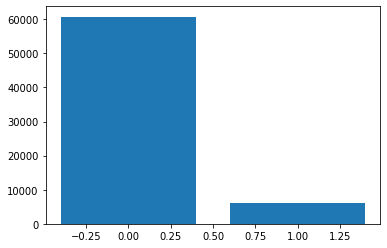

In [14]:
# plot the distribution
#plt.bar(df['label'].unique(), df['label'].value_counts())
#plt.show()

plt.bar(df['OUTPUT_LABEL'].unique(),df['OUTPUT_LABEL'].value_counts() )
plt.show()

El atributo visitas_totales es la combinación de tres atributos, se elimina porque los tres atributos independiente aportan más información que los tres juntos.


In [15]:
## Eliminaremos la columnas visitas_totales
#df = df.drop(['visitas_totales','readmitted', 'OUTPUT_LABEL'], axis= 1)
df = df.drop(['visitas_totales','readmitted'], axis= 1)

<center><h1> Reducción de Dimensionalidad PCA</h1></center>

Se aplicará PCA y LDA

In [16]:
## Acá irá el código para reducir dimensionalidad
#path_df = '/content/drive/MyDrive/001_Diplomado Ciencia de datos Avanzado/Proyecto_1/bd_reingreso_sin_dummys.csv'
#df_sin_dummies = pd.read_csv(path_df)

In [17]:
## dividimos el conjunto de datos 
X = df.drop(['OUTPUT_LABEL'],axis = 1)
y = df['OUTPUT_LABEL'].to_list()

In [18]:
## Para aplicar PCA los datos deben estar estandarizado o escalos
# Escalamos los datos   
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(X_scaled)
xx = pca.transform(X_scaled)

In [20]:
xx.shape


(66843, 5)

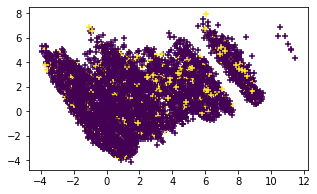

In [21]:
plt.figure(figsize=(5,3))
plt.scatter(xx[:,0], xx[:,1], c=y, marker='+')
plt.show()

In [30]:
X_pca = pd.DataFrame(data = xx)

In [56]:
X_pca = X_pca.iloc[0:100,0:].reset_index(drop = True)

In [57]:
X_pca

,0,1,2,3,4
0,-0.702097,0.118376,0.911553,-0.292464,1.437860
1,0.157707,-1.093349,-0.197908,-0.660046,0.342724
2,-0.457965,-0.116159,0.468661,-0.954617,0.558571
3,-0.385362,-0.180933,0.174356,-2.015900,0.102781
4,-0.448805,-0.301738,-2.812156,0.702869,-1.078226
...,...,...,...,...,...
95,0.006358,-0.694519,-3.315927,-0.657137,-0.896700
96,-2.373880,2.042845,1.751621,3.023293,-0.270853
97,0.267498,-1.630060,1.026310,-0.737111,0.643528
98,-1.444852,0.055409,1.566633,1.865922,-2.392082


In [58]:
y = pd.DataFrame(data = y).iloc[0:100,0].reset_index(drop = True)
y

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    1
97    0
98    1
99    0
Name: 0, Length: 100, dtype: int64

In [ ]:
## Otra implementacion de validacion cruzada estratificada
from sklearn.model_selection import StratifiedKFold # validacion cruzada estratificada
#from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
def cross_validation_stratific_pca(X,y,model,k):

  #Configurando la Validacion cruzada estratificada
  skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)


  metrics = pd.DataFrame()
# Creamos matriz vacia para guardar la matriz de confusion total
  matriz_confusion = np.zeros((2,2))
  acc_score = []
  balance_score = []
  recall_macro = []
  pres_recall_fs = []
  pres = []
  f_1score = []
  auc_roc = []
  count = 0
  for train_index , test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index] , y.iloc[test_index]
    count = count + 1
    print('Iteracion: ', count)
    ## Balanceamos las clases del conjunto de  train, referencia --> https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/
    oversample = RandomOverSampler(sampling_strategy= 'minority')
    #fit y aplicamos la transformacion
    X_train, y_train = oversample.fit_resample(X_train, y_train)
    #print('tipe y_test: ',type(y_test))

    print(pd.DataFrame(y_train).value_counts())
    # Escalamos los datos   
    #scaler = StandardScaler()
    #scaler.fit(X_train)
    #X_train = scaler.transform(X_train)
    #X_test = scaler.transform(X_test)


    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    

    ##Creamos matriz de confusión
    matrix = confusion_matrix(y_test, pred_values)
    print(matrix)
    # sumamos la matriz de confusion
    matriz_confusion = matriz_confusion + matrix

    # Accuracy metrica
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)

    # Balanced score
    bal_score = balanced_accuracy_score(y_test, pred_values)
    balance_score.append(bal_score)

    #recall macro
    recall = recall_score(y_test, pred_values, average='macro')
    recall_macro.append(recall)

    #precision, recall, fscore
    pres_rec_f = precision_recall_fscore_support(y_test, pred_values, average='macro')
    pres_recall_fs.append(pres_rec_f)

    #precision
    presci = precision_score(y_test, pred_values, average='macro')
    pres.append(presci)

    #f1_score
    f1score = f1_score(y_test, pred_values,average='macro')
    f_1score.append(f1score)

    # auc
    auc_metric = roc_auc_score(y_test, pred_values,average='macro')
    auc_roc.append(auc_metric)

  metrics['Model'] = ['Random Forest']
  metrics['metric_avg_acc_score'] = [sum(acc_score)/k]
  metrics['balanced_acc_score'] = [sum(balance_score)/k]
  metrics['recall_macro'] =  [sum(recall_macro)/k]
  metrics['presicion_macro'] = [sum(pres)/k]
  metrics['f1_score_macro'] = [sum(f_1score) / k]
  metrics['AUC'] = [sum(auc_roc) / k]

  #return avg_acc_score, matriz_confusion , balanced_acc_score, recall_macro, pres_recall_fs, presicion_macro, f1_score_macro
  return metrics , matriz_confusion

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [104]:
## Otra implementacion de validacion cruzada estratificada
from sklearn.model_selection import StratifiedKFold # validacion cruzada estratificada
#from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
def StratificPcaRoc(X,y,model,k):
  
  skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
  metrics = pd.DataFrame()
  # Creamos matriz vacia para guardar la matriz de confusion total
  matriz_confusion = np.zeros((2,2))
  acc_score = []
  balance_score = []
  recall_macro = []
  pres_recall_fs = []
  pres = []
  f_1score = []
  auc_roc = []
  ## variables para crear la curva de ROC
  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)
  fig, ax = plt.subplots()
  for i, (train, test) in enumerate(skf.split(X, y)):

      X_train = X.iloc[train]
      y_train = y.iloc[train]
      X_test = X.iloc[test]
      y_test = y.iloc[test]
      ## Balanceamos las clases del conjunto de  train, referencia --> https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/
      oversample = RandomOverSampler(sampling_strategy= 'minority')
      #fit y aplicamos la transformacion
      X_train, y_train = oversample.fit_resample(X_train, y_train)

      y_train = pd.DataFrame(y_train)
      print(y_train[0].value_counts())
      print('*************')
      X_train = pd.DataFrame(data = X_train)
      print(X_train.shape)
      print('****************************')


      # Entrenamiento
      model.fit(X_train, y_train)
      # Prediccion
      pred_values = model.predict(X_test)

          ##Creamos matriz de confusión
      matrix = confusion_matrix(y_test, pred_values)
      print(matrix)
      # sumamos la matriz de confusion
      matriz_confusion = matriz_confusion + matrix
      ## Calculo de metricas para cada fold

      # Accuracy metrica
      acc = accuracy_score(y_test, pred_values)
      acc_score.append(acc)
      # Balanced score
      bal_score = balanced_accuracy_score(y_test, pred_values)
      balance_score.append(bal_score)

      #recall macro
      recall = recall_score(y_test, pred_values, average='macro')
      recall_macro.append(recall)

      #precision, recall, fscore
      pres_rec_f = precision_recall_fscore_support(y_test, pred_values, average='macro')
      pres_recall_fs.append(pres_rec_f)

      #precision
      presci = precision_score(y_test, pred_values, average='macro')
      pres.append(presci)

      #f1_score
      f1score = f1_score(y_test, pred_values,average='macro')
      f_1score.append(f1score)

      # auc
      auc_metric = roc_auc_score(y_test, pred_values,average='macro')
      auc_roc.append(auc_metric)


      viz = plot_roc_curve(model, X_test, y_test,
                          name='ROC fold {}'.format(i),
                          alpha=0.3, lw=1, ax=ax)
      interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
      interp_tpr[0] = 0.0
      tprs.append(interp_tpr)
      aucs.append(viz.roc_auc)

  ## Armando el dataframe con metricas
  metrics['Model'] = ['Random Forest']
  metrics['metric_avg_acc_score'] = [sum(acc_score)/k]
  metrics['balanced_acc_score'] = [sum(balance_score)/k]
  metrics['recall_macro'] =  [sum(recall_macro)/k]
  metrics['presicion_macro'] = [sum(pres)/k]
  metrics['f1_score_macro'] = [sum(f_1score) / k]
  metrics['AUC'] = [sum(auc_roc) / k]


  ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
          label='Chance', alpha=.8)

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(mean_fpr, mean_tpr)
  std_auc = np.std(aucs)
  ax.plot(mean_fpr, mean_tpr, color='b',
          label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
          lw=2, alpha=.8)

  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                  label=r'$\pm$ 1 std. dev.')

  ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
        title="Curva ROC")
  ax.legend(loc="lower right")
  plt.show()

  return metrics , matriz_confusion/k

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/sklearn/utils/depre

1    72
0    72
Name: 0, dtype: int64
*************
(144, 5)
****************************
[[16  2]
 [ 2  0]]
1    72
0    72
Name: 0, dtype: int64
*************
(144, 5)
****************************
[[15  3]
 [ 2  0]]
1    72
0    72
Name: 0, dtype: int64
*************
(144, 5)
****************************
[[16  2]
 [ 1  1]]
1    72
0    72
Name: 0, dtype: int64
*************
(144, 5)
****************************
[[15  3]
 [ 2  0]]
1    72
0    72
Name: 0, dtype: int64
*************
(144, 5)
****************************
[[15  3]
 [ 2  0]]


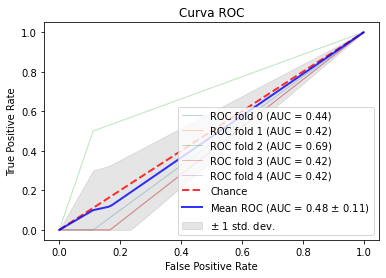

In [110]:
from sklearn.ensemble import RandomForestClassifier #Random forest
metrics, mc = StratificPcaRoc(X_pca,y, RandomForestClassifier(n_estimators=1, random_state=0) , 5)

In [111]:
metrics

,Model,metric_avg_acc_score,balanced_acc_score,recall_macro,presicion_macro,f1_score_macro,AUC
0,Random Forest,0.78,0.477778,0.477778,0.481046,0.47746,0.477778


In [107]:
mc

array([[15.6,  2.4],
       [ 1.8,  0.2]])

In [ ]:
# Probamos el modelo con las 5 componentes principales
#Importamos Librerias
from sklearn.ensemble import RandomForestClassifier #Random forest
metrics = cross_validation_stratific_pca(X,y,RandomForestClassifier(n_estimators=200, random_state=0),10)

Iteracion:  1
1    54692
0    54692
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[[6060   17]
 [ 596   12]]
Iteracion:  2
1    54692
0    54692
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[[6058   19]
 [ 595   13]]
Iteracion:  3
1    54692
0    54692
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[[6045   32]
 [ 602    6]]
Iteracion:  4
1    54692
0    54692
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[[6053   24]
 [ 599    8]]
Iteracion:  5
1    54692
0    54692
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[[6055   22]
 [ 593   14]]
Iteracion:  6
1    54692
0    54692
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[[6058   19]
 [ 597   10]]
Iteracion:  7
1    54692
0    54692
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[[6052   25]
 [ 597   10]]
Iteracion:  8
1    54692
0    54692
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[[6058   19]
 [ 600    7]]
Iteracion:  9
1    54692
0    54692
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[[6051   26]
 [ 599    8]]
Iteracion:  10
1    54693
0    54693
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[[6053   23]
 [ 593   15]]


In [ ]:
metrics

,Model,metric_avg_acc_score,balanced_acc_score,recall_macro,presicion_macro,f1_score_macro,AUC
0,Random Forest,0.90729,0.506619,0.506619,0.612446,0.491736,0.506619


In [ ]:
df

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,tratamientos_tomados,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_type_id_7,admission_type_id_8,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,discharge_disposition_id_8,discharge_disposition_id_9,discharge_disposition_id_10,discharge_disposition_id_12,discharge_disposition_id_15,discharge_disposition_id_16,discharge_disposition_id_17,discharge_disposition_id_18,discharge_disposition_id_22,discharge_disposition_id_23,discharge_disposition_id_24,discharge_disposition_id_25,discharge_disposition_id_27,discharge_disposition_id_28,admission_source_id_2,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_20,admission_source_id_22,admission_source_id_25,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_No,diabetesMed_Yes,categorias_diag_1_1,categorias_diag_1_2,categorias_diag_1_3,categorias_diag_1_4,categorias_diag_1_5,categorias_diag_1_6,categorias_diag_1_7,categorias_diag_1_8,OUTPUT_LABEL
0,15,3,59,0,18,0,0,0,9,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,25,2,11,5,13,2,0,1,6,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0
2,35,2,44,1,16,0,0,0,7,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,45,1,51,0,8,0,0,0,5,2.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
4,55,3,31,6,16,0,0,0,9,1.0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66838,75,9,50,2,33,0,0,0,9,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
66839,45,14,73,6,26,0,1,0,9,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
66840,65,2,46,6,17,1,1,1,9,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0
66841,0,5,76,1,22,0,1,0,9,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


# Agregando la curva de roc

In [ ]:
## Agragando la curva de ROC
## Otra implementacion de validacion cruzada estratificada
from sklearn.model_selection import StratifiedKFold # validacion cruzada estratificada
#from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
def cross_validation_stratific_roc(X,y,model,k):

  #Configurando la Validacion cruzada estratificada
  skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)


  metrics = pd.DataFrame()
# Creamos matriz vacia para guardar la matriz de confusion total
  matriz_confusion = np.zeros((2,2))
  acc_score = []
  balance_score = []
  recall_macro = []
  pres_recall_fs = []
  pres = []
  f_1score = []
  auc_roc = []
  count = 0
  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)
  plt.figure(figsize=(10,10))
  i = 0
  for train_index , test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index] , y.iloc[test_index]
    count = count + 1
    print('Iteracion: ', count)
    ## Balanceamos las clases del conjunto de  train, referencia --> https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/
    oversample = RandomOverSampler(sampling_strategy= 'minority')
    #fit y aplicamos la transformacion
    X_train, y_train = oversample.fit_resample(X_train, y_train)
    #print('tipe y_test: ',type(y_test))

    print(pd.DataFrame(y_train).value_counts())
    # Escalamos los datos   
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)


    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    ## Calculamos la probabilidad para cada fila
    probs = model.predict_proba(X_test)

    # Graficando Curva de ROC
    fpr, tpr, thresholds = metrics.roc_curve(y_test, probs[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))


    ##Creamos matriz de confusión
    matrix = confusion_matrix(y_test, pred_values)
    print(matrix)
    # sumamos la matriz de confusion
    matriz_confusion = matriz_confusion + matrix

    # Accuracy metrica
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)

    # Balanced score
    bal_score = balanced_accuracy_score(y_test, pred_values)
    balance_score.append(bal_score)

    #recall macro
    recall = recall_score(y_test, pred_values, average='macro')
    recall_macro.append(recall)

    #precision, recall, fscore
    pres_rec_f = precision_recall_fscore_support(y_test, pred_values, average='macro')
    pres_recall_fs.append(pres_rec_f)

    #precision
    presci = precision_score(y_test, pred_values, average='macro')
    pres.append(presci)

    #f1_score
    f1score = f1_score(y_test, pred_values,average='macro')
    f_1score.append(f1score)

    # auc
    auc_metric = roc_auc_score(y_test, pred_values,average='macro')
    auc_roc.append(auc_metric)

    i += 1


  
  metrics['Model'] = ['Random Forest']
  metrics['metric_avg_acc_score'] = [sum(acc_score)/k]
  metrics['balanced_acc_score'] = [sum(balance_score)/k]
  metrics['recall_macro'] =  [sum(recall_macro)/k]
  metrics['presicion_macro'] = [sum(pres)/k]
  metrics['f1_score_macro'] = [sum(f_1score) / k]
  metrics['AUC'] = [sum(auc_roc) / k]


  plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(mean_fpr, mean_tpr)
  std_auc = np.std(aucs)
  plt.plot(mean_fpr, mean_tpr, color='b',
          label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
          lw=2, alpha=.8)

  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                  label=r'$\pm$ 1 std. dev.')

  plt.xlim([-0.01, 1.01])
  plt.ylim([-0.01, 1.01])
  plt.xlabel('False Positive Rate',fontsize=18)
  plt.ylabel('True Positive Rate',fontsize=18)
  plt.title('Cross-Validation ROC of SVM',fontsize=18)
  plt.legend(loc="lower right", prop={'size': 15})
  plt.show()

  #return avg_acc_score, matriz_confusion , balanced_acc_score, recall_macro, pres_recall_fs, presicion_macro, f1_score_macro
  return metrics , matriz_confusion

In [ ]:
cross_validation_stratific_roc(X,y,RandomForestClassifier(n_estimators=200,random_state=0),10)

AttributeError: ignored

<Figure size 720x720 with 0 Axes>

In [ ]:
cv = StratifiedKFold(n_splits=10)
classifier = SVC(kernel='sigmoid',probability=True,random_state=0)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train, test in cv.split(X_train_res, y_train_res):
    probas_ = classifier.fit(X_train_res[train], y_train_res[train]).predict_proba(X_train_res[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train_res[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of SVM',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()

# <center><h1>Reduccion de Dimensionalidad LDA</h1></center>

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda = lda.fit(X_scaled, y)
X_r2 = lda.transform(X_scaled)
np.unique(y)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(74, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


array([0, 1])

In [ ]:
X_r2.shape

(66843, 1)

In [ ]:
colors = ['navy', 'turquoise']

plt.figure()
for color, i, target_name in zip(colors, [1, 2], ['clase 1', 'clase 2']):
    plt.scatter(X_r2[y == i][:, 0], X_r2[y == i][:, 1], alpha=.8, color=color,
                label=target_name, s=10)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Reduccion LDA')

plt.legend(bbox_to_anchor=(1.3, 1.05))
plt.show()

TypeError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
X_r2

array([[-0.45434152],
       [ 0.12308009],
       [-0.56827499],
       ...,
       [ 0.16376414],
       [-0.22639475],
       [-0.66462956]])

In [ ]:
#### Pruebas,  seleccionando un dataframe mas pequeño
muestras_positivas = df.OUTPUT_LABEL == 1
positivas = df.loc[muestras_positivas].iloc[0:60].reset_index(drop = True)
negativas = df.loc[~muestras_positivas].iloc[0:600].reset_index(drop = True)
df = pd.concat([positivas, negativas], axis = 0).reset_index(drop = True)

In [ ]:
## dividimos el conjunto de datos 
X = df.drop(['OUTPUT_LABEL'],axis = 1)
y = df['OUTPUT_LABEL']

In [ ]:
#y = pd.DataFrame(data = y.values.reshape(660,1))

In [ ]:
#type(y)

In [ ]:
## Dividimos los datos en train (70%) y test (30%)
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#print(y_train.value_counts())

In [ ]:
#desbalance en el conjunto de train
# plot the distribution
#plt.bar(y_train.unique(), y_train.value_counts())
#plt.show()

In [ ]:
## Instalando libreria 
#!pip install imbalanced-learn

In [ ]:
## dividimos el conjunto de datos 
#X = df.drop(['OUTPUT_LABEL'],axis = 1)
#y = df['OUTPUT_LABEL']

In [ ]:
#y = pd.DataFrame(data = y)
#y.head()

# Implementando cross-validation k-Fold Estratificada para Algoritmos de Clasificación

*Con validación cruzada estratificada, no es necesario oversamplear los datos de entrenamiento:

**StratifiedKFold** es una variación de k-fold que devuelve pliegues estratificados: cada conjunto contiene aproximadamente el mismo porcentaje de muestras de cada clase objetivo que el conjunto completo

# Solo con validacion cruzada estratificada
def Only_Stratified_Kfold(X,y,model):
  from sklearn.model_selection import StratifiedKFold # validacion cruzada estratificada
  from sklearn.preprocessing import StandardScaler
  import imblearn
  
  #Configurando la Validacion cruzada estratificada
  skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

  from sklearn.metrics import confusion_matrix
  from sklearn.model_selection import cross_val_score
  from sklearn import metrics

  # Creamos matriz vacia para guardar la matriz de confusion total
  matriz_confusion = np.zeros((2,2))
  confusion_matrix_array = []
  accuracy_train = []
  accuracy_test = []

  ## Probando con el modelo
  #tiempo_inicial = time()
  for train_index , test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    ## Balanceamos las clases del conjunto de  train, referencia --> https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/
   # oversample = RandomOverSampler(sampling_strategy= 'minority')
    ## fit y aplicamos la transformacion
    #X_over_train, y_over_train = oversample.fit_resample(X_train, y_train)
    #print('tipe y_test: ',type(y_test))


    # Escalamos los datos   
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # Entrenamos el modelo
    model.fit(X_train, y_train)

    #accuracy de train
    score_train = cross_val_score(model, X_train, X_test, cv = skf, scoring = 'accuracy')
    accuracy_train.append(score_train)


    #Predicciones
    pred = model.predict(X_test)
    #print('type de pred :', type(pred))

    ## Accuracy test
    score_test = metrics.accuracy_score(y_test, pred)
    accuracy_test.append(score_test)

    #pred = pd.DataFrame(data = pred)
    #print('type de pred_dataframe:', type(pred))
    # Probabilidad para la fila
    #prob = model.predict_proba(X_test)


    ##Creamos matriz de confusión
    matrix = confusion_matrix(y_test, pred)
    # sumamos la matriz de confusion
    matriz_confusion = matriz_confusion + matrix
    # Guardamos los arrays de la amtriz en una lista
    #confusion_matrix_array.append(matrix)

  accuracy_test = accuracy_test.mean()
  accuracy_cross_validation = accuracy_train.mean()
  # Scores
  from sklearn.model_selection import cross_validate
  from sklearn.metrics import recall_score
  from sklearn.metrics import make_scorer
  #scoring = {'prec_macro':'precision_macro','rec_macro': make_scorer(recall_score, avarage = 'macro')}
  #scores = cross_validate(model, X,y, scoring = scoring, cv = skf, return_train_score=True)
  #accuracy = cross_validate(model, X, y, cv = 10)
  #from sklearn import model_selection
  #accuracy = model_selection.cross_val_score(model, X, y, cv = skf)
  return matriz_confusion, accuracy_cross_validation

In [ ]:
#Importamos Librerias
from sklearn.ensemble import RandomForestClassifier #Random forest
#confusion, accuracy  = Only_Stratified_Kfold(X,y, RandomForestClassifier(n_estimators=200, random_state=0))
## dividimos el conjunto de datos 
X = df.drop(['OUTPUT_LABEL'],axis = 1)
y = df['OUTPUT_LABEL']

In [ ]:
## Otra implementacion de validacion cruzada estratificada
def cross_validation_stratific(X,y,model,k):
  from sklearn.model_selection import StratifiedKFold # validacion cruzada estratificada
  from sklearn.preprocessing import StandardScaler
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import confusion_matrix
  from imblearn.over_sampling import RandomOverSampler
  from sklearn.metrics import balanced_accuracy_score
  from sklearn.metrics import recall_score
  from sklearn.metrics import precision_recall_fscore_support
  from sklearn.metrics import precision_score
  from sklearn.metrics import f1_score
  from sklearn.metrics import roc_auc_score
  #Configurando la Validacion cruzada estratificada
  skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Creamos matriz vacia para guardar la matriz de confusion total
  matriz_confusion = np.zeros((2,2))
  acc_score = []
  balance_score = []
  recall_macro = []
  pres_recall_fs = []
  pres = []
  f_1score = []
  auc_roc = []
  for train_index , test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index] , y.iloc[test_index]

    ## Balanceamos las clases del conjunto de  train, referencia --> https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/
    oversample = RandomOverSampler(sampling_strategy= 'minority')
    #fit y aplicamos la transformacion
    X_train, y_train = oversample.fit_resample(X_train, y_train)
    #print('tipe y_test: ',type(y_test))

    #print(pd.DataFrame(y_train).value_counts())
    # Escalamos los datos   
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)


    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    ##Creamos matriz de confusión
    matrix = confusion_matrix(y_test, pred_values)
    #print(matrix)
    # sumamos la matriz de confusion
    matriz_confusion = matriz_confusion + matrix

    # Accuracy metrica
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)

    # Balanced score
    bal_score = balanced_accuracy_score(y_test, pred_values)
    balance_score.append(bal_score)

    #recall macro
    recall = recall_score(y_test, pred_values, average='macro')
    recall_macro.append(recall)

    #precision, recall, fscore
    pres_rec_f = precision_recall_fscore_support(y_test, pred_values, average='macro')
    pres_recall_fs.append(pres_rec_f)

    #precision
    presci = precision_score(y_test, pred_values, average='macro')
    pres.append(presci)

    #f1_score
    f1score = f1_score(y_test, pred_values,average='macro')
    f_1score.append(f1score)


    # auc
    auc_metric = roc_auc_score(y_test, pred_values,average='macro')
    auc_roc.append(auc_metric)

  metrics['Model'] = ['Random Forest']
  metrics['metric_avg_acc_score'] = [sum(acc_score)/k]
  metrics['balanced_acc_score'] = [sum(balance_score)/k]
  metrics['recall_macro'] =  [sum(recall_macro)/k]
  metrics['presicion_macro'] = [sum(pres)/k]
  metrics['f1_score_macro'] = [sum(f_1score) / k]
  metrics['AUC'] = [sum(auc_roc) / k]

  #return avg_acc_score, matriz_confusion , balanced_acc_score, recall_macro, pres_recall_fs, presicion_macro, f1_score_macro
  return metrics


In [ ]:
#Importamos Librerias
from sklearn.ensemble import RandomForestClassifier #Random forest
metrics = cross_validation_stratific(X,y,RandomForestClassifier(n_estimators=200, random_state=0),10)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
metrics

,Model,metric_avg_acc_score,balanced_acc_score,recall_macro,presicion_macro,f1_score_macro,AUC
0,Random Forest,0.907664,0.508233,0.508233,0.634178,0.494745,0.508233


In [ ]:
recall_macro

0.4966666666666667

In [ ]:
pres_rec_fs

[(0.45454545454545453, 0.5, 0.47619047619047616, None),
 (0.45384615384615384, 0.49166666666666664, 0.472, None),
 (0.45454545454545453, 0.5, 0.47619047619047616, None),
 (0.45454545454545453, 0.5, 0.47619047619047616, None),
 (0.45454545454545453, 0.5, 0.47619047619047616, None),
 (0.45454545454545453, 0.5, 0.47619047619047616, None),
 (0.4523809523809524, 0.475, 0.46341463414634143, None),
 (0.45454545454545453, 0.5, 0.47619047619047616, None),
 (0.45454545454545453, 0.5, 0.47619047619047616, None),
 (0.45454545454545453, 0.5, 0.47619047619047616, None)]

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold # validacion cruzada estratificada
 

 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
 

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Random Forest 
from sklearn.ensemble import RandomForestClassifier #Random forest

cld_rf = RandomForestClassifier(n_estimators=200, random_state=0)

 
cld_rf.fit(X_train, y_train)
 
score = cld_rf.score(X_train,y_train)
 
print("Metrica del modelo", score)
 
scores = cross_val_score(cld_rf, X_train, y_train, cv=skf, scoring="accuracy")
 
print("Metricas cross_validation", scores)
 
print("Media de cross_validation", scores.mean())
 
preds = cld_rf.predict(X_test)
 
score_pred = metrics.accuracy_score(y_test, preds)
 
print("Metrica en Test", score_pred)

Metrica del modelo 1.0


KeyboardInterrupt: ignored

In [ ]:
y_train.value_counts()

0    422
1     40
Name: OUTPUT_LABEL, dtype: int64

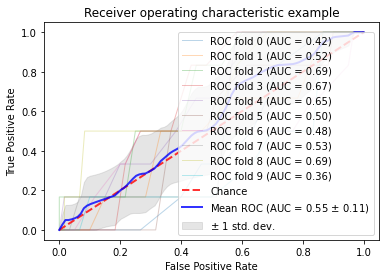

In [ ]:
# Curva ROC

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
## dividimos el conjunto de datos 
X = df.drop(['OUTPUT_LABEL'],axis = 1)
y = df['OUTPUT_LABEL']
#X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
#cv = StratifiedKFold(n_splits=6)
  
#Configurando la Validacion cruzada estratificada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
classifier = RandomForestClassifier(n_estimators=200, random_state=0)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mxean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: scipy.interp is deprecated and will be removed in 

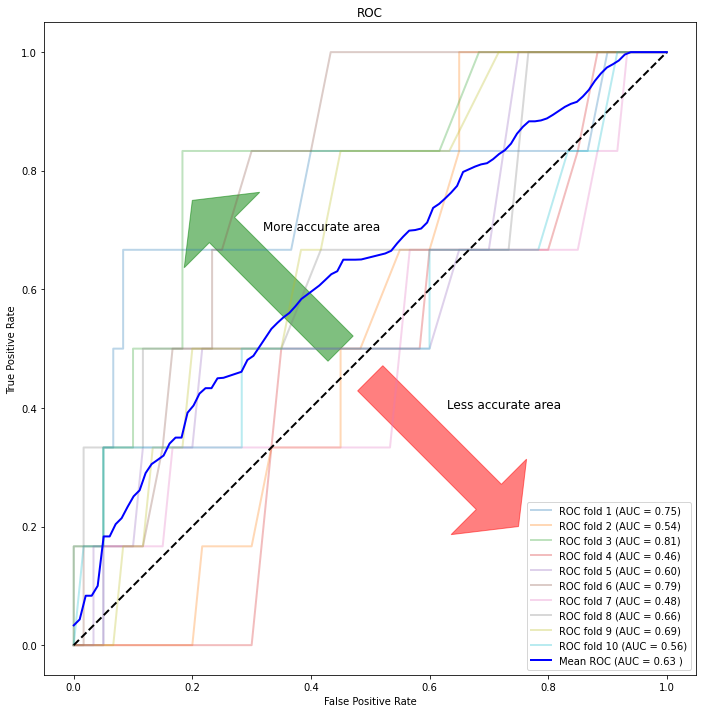

In [ ]:
import matplotlib.patches as patches
from sklearn.metrics import roc_curve,auc
from scipy import interp

x = df.drop(['OUTPUT_LABEL'],axis = 1)
y = df['OUTPUT_LABEL']

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
clf = RandomForestClassifier(n_estimators=200, random_state=0)
# plot arrows
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold # validacion cruzada estratificada
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

#Configurando la Validacion cruzada estratificada
skf = StratifiedKFold(n_splits=10, shuffle= True, random_state= 42)

# Random Forest 
from sklearn.ensemble import RandomForestClassifier #Random forest

cld_rf = RandomForestClassifier(n_estimators=200, random_state=0)

## Probando con el modelo

for train_index , test_index in skf.split(X,y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  ## Balanceo de la clase de entrenamiento usando oversampling




  # Escalamos los datos
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  # Entrenamos el modelo
  cld_rf.fit(X_train, y_train)

  #Predicciones
  #train_pred = cld_rf.predict(X_train)
  pred = cld_rf.predict(X_test)

  # Probabilidad para la fila

  prob = cld_rf.predict_proba(X_test)


In [ ]:
random_forest = Stratified_Kfold(X,y, RandomForestClassifier(n_estimators=200, random_state=0))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


,Prediccion,0,1,2,label
0,2,0.160,0.370,0.470,2
1,2,0.080,0.355,0.565,2
2,2,0.035,0.240,0.725,2
3,2,0.070,0.185,0.745,2
4,1,0.035,0.575,0.390,2
...,...,...,...,...,...
11769,1,0.400,0.595,0.005,1
11770,0,0.515,0.475,0.010,1
11771,1,0.070,0.795,0.135,1
11772,0,0.535,0.465,0.000,1


In [ ]:
random_forest.head()

,Prediccion,0,1,2,label
0,2,0.160,0.370,0.470,2
1,2,0.080,0.355,0.565,2
2,2,0.035,0.240,0.725,2
3,2,0.070,0.185,0.745,2
4,1,0.035,0.575,0.390,2


In [ ]:
## Matriz de confusion para random forest
matriz = pd.crosstab(df['label'], df['Prediccion'],rownames=['Actual'], colnames=['Predicted'], margins = True)
matriz

Predicted,0,1,2,All
Actual,,,,
0,3865,59,1,3925
1,1954,1970,0,3924
2,28,985,2912,3925
All,5847,3014,2913,11774


In [ ]:
from sklearn.metrics import accuracy_score,classification_report
print('Accuracy: %.2f' % accuracy_score(random_forest['label'],random_forest['Prediccion']))

Accuracy: 0.74


In [ ]:
print(classification_report(random_forest['label'],random_forest['Prediccion']))

              precision    recall  f1-score   support

           0       0.66      0.98      0.79      3925
           1       0.65      0.50      0.57      3924
           2       1.00      0.74      0.85      3925

    accuracy                           0.74     11774
   macro avg       0.77      0.74      0.74     11774
weighted avg       0.77      0.74      0.74     11774



In [ ]:
mport matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
#Importando librería metrics para visualizar la curva ROC
from sklearn import metrics

# calculate the fpr and tpr for all thresholds of the classification
probs = mlp.predict_proba(X_prueba)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_prueba, preds)
roc_auc = metrics.auc(fpr, tpr)

# metodo curva de ROC
import matplotlib.pyplot as plt
plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# <center><h1> Aplicando Sobremuestreo SMOTE </h1></center>

In [ ]:
## Sobremuestreo, referencia ---> https://machinelearningmastery.com/multi-class-imbalanced-classification/
!pip install imbalanced-learn

In [ ]:
# check version number
import imblearn
print(imblearn.__version__)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


0.4.3


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from imblearn.over_sampling import SMOTE
X = df.drop(['label'],axis = 1)
y = df['label']
oversample = SMOTE()
X,y = oversample.fit_resample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# <center><h1> Clases Balanceadas </h1></center>

Class=1, n=39248 (33.333%)
Class=2, n=39248 (33.333%)
Class=0, n=39248 (33.333%)


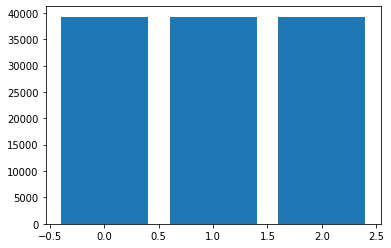

In [ ]:
from collections import Counter
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

# Ahora tenemos las clases balanceadas, aplicaremos algoritmos de clasificacion

In [ ]:
## Para una mejor manipulación de los datos se pasarán a dataframes
X = pd.DataFrame(data = X, columns = df.drop(['label'],axis = 1).columns)
y = pd.DataFrame(data = y, columns = ['label'])

## Con selec k-best veremos cuales son los atributos que más poder predictivo tienen

In [ ]:
## Métodos de Filtro
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Extracción de Carácterísticas: chi-cuadrado
prueba = SelectKBest(score_func = chi2, k=5)
entrenamiento = prueba.fit(X,y)

scores = pd.DataFrame(data = list(zip(X.columns, entrenamiento.scores_)), columns = ['Atributo','Scores']).sort_values(by='Scores', ascending = False)
scores

,Atributo,Scores
7,number_inpatient,4101.916342
2,num_lab_procedures,4082.085533
36,discharge_disposition_id_22,1824.609880
4,num_medications,1694.227648
1,time_in_hospital,1560.940693
...,...,...
17,admission_type_id_4,1.864267
60,max_glu_serum_Norm,1.018833
59,max_glu_serum_None,0.736664
28,discharge_disposition_id_8,0.010946


# <center><h1>Entrenaremos Algoritmos de Clasificación </h1></center>

---



# <center><h1> Separación  de datos común </h1></center>

In [ ]:
# Estandarizamos la data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

## Dividimos los datos en train (70%) y test (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Importamos Librerias
from sklearn.naive_bayes import GaussianNB ## Naive bayes
from sklearn.neighbors import KNeighborsClassifier ## KNN
from sklearn import svm  # Support Vector Machine
from sklearn.ensemble import RandomForestClassifier #Random forest
from sklearn.tree import DecisionTreeClassifier, export_graphviz ## Arboles de descision 

## Naive Bayes
clf_gnb = GaussianNB()
## Entrenamiento
clf_gnb = clf_gnb.fit(X_train, y_train)
## Prediccion
y_hat_gnb = clf_gnb.predict(X_test)

## KNN
clf_knn = KNeighborsClassifier(n_neighbors=100)
## Entrenamiento
clf_knn = clf_knn.fit(X_train, y_train)
## Prediccion
y_hat_knn = clf_knn.predict(X_test)

## SVM
clf_svm = svm.SVC(kernel='rbf') 
clf_svm = clf_svm.fit(X_train, y_train)
y_hat_svm = clf_svm.predict(X_test)

# Decision Tree Classifier
clf_dt = DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train,y_train)
y_hat_dt = clf_dt.predict(X_test)

## Random Forest
cld_rf = RandomForestClassifier(n_estimators=200, random_state=0)
cld_rf = cld_rf.fit(X_train,y_train)
y_hat_rf = cld_rf.predict(X_test)


from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


metrics = pd.DataFrame()

acc_list = []
bacc_list = []
pre_list = []
reca_list = []
f1_list = []
for pred in [y_hat_gnb, y_hat_knn, y_hat_svm, y_hat_dt, y_hat_rf]:
    acc_list.append(accuracy_score(y_test, pred))
    bacc_list.append(balanced_accuracy_score(y_test, pred))
    pre_list.append(precision_score(y_test, pred, average='macro'))
    reca_list.append(recall_score(y_test, pred, average='macro'))
    f1_list.append(f1_score(y_test, pred, average='macro'))

models = ['Gaussian Naive Bayes', "kNN", "SVM", "Decision Tree", "Random Forest"]

metrics['Model'] = models
metrics['ACC'] = acc_list
metrics['BACC'] = bacc_list
metrics['Precision'] = pre_list
metrics['Recall'] = reca_list
metrics['F1'] = f1_list

metrics.sort_values('F1', ascending=False)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


,Model,ACC,BACC,Precision,Recall,F1
4,Random Forest,0.693466,0.692599,0.694771,0.692599,0.677544
2,SVM,0.605764,0.604581,0.609522,0.604581,0.595892
3,Decision Tree,0.593449,0.593356,0.591566,0.593356,0.592342
1,kNN,0.528649,0.528204,0.525835,0.528204,0.525196
0,Gaussian Naive Bayes,0.336004,0.337852,0.442278,0.337852,0.183158


In [ ]:
resultados_pred = pd.DataFrame(data = [y_hat_dt,y_hat_gnb,y_hat_knn,y_hat_rf,y_hat_svm, y_test['label']
])

In [ ]:
resultados = resultados_pred.T.rename(columns = {0:'y_hat_dt', 1:'y_hat_gnb', 2:'y_hat_knn',3:'y_hat_rf',4:'y_hat_svm', 5:'y_test'})
resultados

,y_hat_dt,y_hat_gnb,y_hat_knn,y_hat_rf,y_hat_svm,y_test
0,1,0,2,0,0,0
1,1,0,2,1,0,1
2,0,0,0,0,0,0
3,1,0,2,1,2,2
4,0,0,0,1,2,2
...,...,...,...,...,...,...
35319,1,0,2,2,2,2
35320,0,0,2,0,1,0
35321,0,0,0,0,0,0
35322,1,0,2,1,2,1


In [ ]:
#resultados.to_csv('/content/drive/MyDrive/001_Diplomado Ciencia de datos Avanzado/Proyecto_1/Modelo_de_Prediccion_Reingreso_Hospitalario/resultados_tres_clases.csv')